# Emission Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import astropy.units as u
import fiasco

import synthesizAR
from hi_c import CustomEmissionModel

%matplotlib inline

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Build an emission model with the needed ions:

* Fe VIII
* Fe IX
* Fe X
* Fe XI
* Fe XII
* Fe XIII
* Fe XIV
* Fe XV
* Fe XVI
* ~~Fe XVII~~
* ~~Fe XVIII~~
* ~~Fe XIX~~
* ~~Fe XX~~
* ~~Fe XXI~~
* ~~Fe XXII~~
* ~~Fe XXIII~~
* ~~Fe XXIV~~
* ~~Fe XXV~~

Base on the AIA temperature response, we should probably also include oxygen and nickel as well. However, our ionization equilibrium file is already going to balloon in size so it is best to just focus on Fe for now. We could even exclude some of the really hot stuff, i.e. anything above Fe XVII or Fe XVIII.

In [2]:
temperature = 10.**(np.arange(4.5,8,0.05))*u.K
density = np.logspace(7,11,15)/(u.cm**3)

In [3]:
iron = fiasco.Element('iron',temperature)

In [4]:
ioneq = iron.equilibrium_ionization()

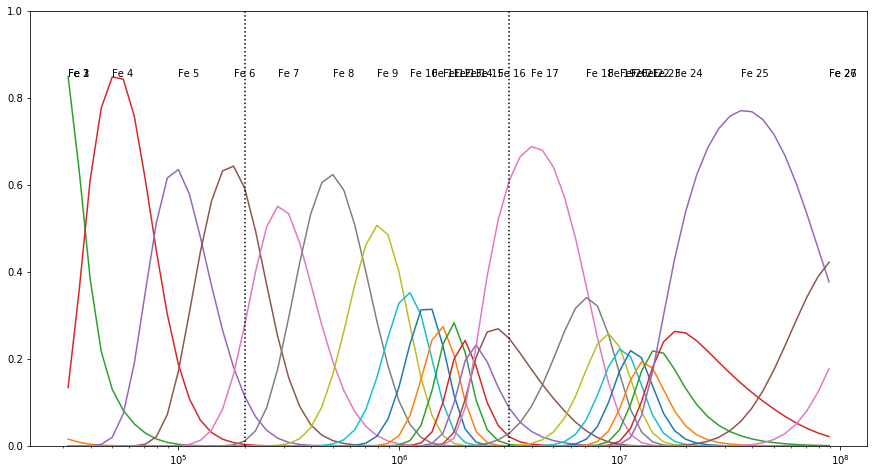

In [11]:
plt.figure(figsize=(15,8))
for i,ion in enumerate(iron):
    plt.plot(temperature,ioneq[:,i])
    tmax = temperature[np.argmax(ioneq[:,i])]
    ioneqmax = np.max(ioneq)
    plt.text(tmax.value,ioneqmax.value,ion.ion_name)
plt.ylim(0,1)
plt.xscale('log')
plt.axvline(x=10**(5.3),ls=':',color='k')
plt.axvline(x=10**(6.5),ls=':',color='k')

First, build the emission model using the above ions.

In [15]:
ions = [fiasco.Ion(f'iron {i}',temperature,abundance_filename='sun_coronal_1992_feldman') for i in range(8,17)]

In [16]:
em_model = CustomEmissionModel(density,*ions,)

Then, compute the emissivity for each ion.

In [17]:
em_model.calculate_emissivity('/storage-home/w/wtb2/data/hi_c_simulation/emissivity_table.h5',notebook=True)

FloatProgress(value=0.0)

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/fiasco/ion.py:223: RuntimeWarning: invalid value encountered in greater
  ex_rate = u.Quantity(np.where(ex_rate > 0., ex_rate, 0.), u.cm**3/u.s).T


In [3]:
active_region = synthesizAR.Field.restore('/storage-home/w/wtb2/data/hi_c_simulation/field_checkpoint/')

In [5]:
em_model.calculate_ionization_fraction(active_region, '/storage-home/w/wtb2/data/hi_c_simulation/ionization_fractions.h5')

And save the emission model

In [7]:
em_model.save('/storage-home/w/wtb2/data/hi_c_simulation/emission_model.json')